# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict the Item_outlet_sales and our aim is to build a predictive model and predict the sales of each product at a particular outlet.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Big Mart Sales dataset from Kaggle which contains about 8523 rows and 12 features that can be downloaded <a href="https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are continuous. So the problem we have is a Supervised Regression type.
</p></li>  
</ul>

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_v9rqX0R.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
for col in train.columns:
    print(f'{col}: ')
    print(f'Unique values in columns {col} : {train[col].nunique()}')
    print(train[col].value_counts())
    print('_'* 40)

Item_Identifier: 
Unique values in columns Item_Identifier : 1559
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
________________________________________
Item_Weight: 
Unique values in columns Item_Weight : 415
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
________________________________________
Item_Fat_Content: 
Unique values in columns Item_Fat_Content : 5
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
________________________________________
Item_Visibility: 
Unique values in columns Item_Visibility : 7880
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646

# Benchmark

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
for group, df in  train.groupby(['Item_Type', 'Outlet_Type']):
    print(group)
    
    print(f'Mean MRP :{df["Item_MRP"].mean()}')
    print(f'Sales Mean: {df["Item_Outlet_Sales"].mean()}')
    print('_'*40)


('Baking Goods', 'Grocery Store')
Mean MRP :126.43806823529412
Sales Mean: 292.0825435294118
________________________________________
('Baking Goods', 'Supermarket Type1')
Mean MRP :125.97526150234742
Sales Mean: 2102.021248826291
________________________________________
('Baking Goods', 'Supermarket Type2')
Mean MRP :126.38531470588235
Sales Mean: 1780.3687823529413
________________________________________
('Baking Goods', 'Supermarket Type3')
Mean MRP :128.8092434782609
Sales Mean: 3248.8724173913047
________________________________________
('Breads', 'Grocery Store')
Mean MRP :146.4528727272727
Sales Mean: 381.9674424242425
________________________________________
('Breads', 'Supermarket Type1')
Mean MRP :140.56755249999998
Sales Mean: 2346.928355
________________________________________
('Breads', 'Supermarket Type2')
Mean MRP :131.08900740740742
Sales Mean: 2022.4044888888889
________________________________________
('Breads', 'Supermarket Type3')
Mean MRP :145.67623870967745
Sale

In [9]:
mrp = []
sales = []

for group, df in train.groupby(['Item_Type', 'Outlet_Type']):
    mrp.append(df["Item_MRP"].mean())
    sales.append(df["Item_Outlet_Sales"].mean())
    

Text(0.5, 1.0, 'Benchmark')

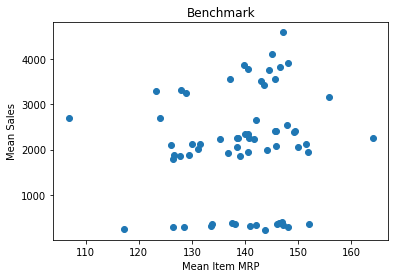

In [10]:
plt.scatter(np.array(mrp), np.array(sales))
plt.xlabel('Mean Item MRP')
plt.ylabel('Mean Sales')
plt.title('Benchmark')

In [11]:
#END of Benchmark

# Steps For Data PreProcessing

In [12]:
# Data Cleansing (if there cleansing required)
# Missing Value Imputation (if there are missing/null values)
# Feature Engineering (if required)
# EDA - Exploratory Data Analysis
# Outlier Handling (if there are outliers)
# Categorical Encoding (if there are categorical variables/features)
# Data Split
# Feature Scaling

# Data Cleansing

In [13]:
item_fat_content_dict = {'low fat':'Low Fat', 
                        'LF':'Low Fat',
                        'Low Fat':'Low Fat',
                        'Regular':'Regular',
                        'reg':'Regular'}

In [14]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(item_fat_content_dict)

In [16]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Missing Value Imputations

In [17]:
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [18]:
train['Item_Weight'].isnull().sum()

1463

# Mean Imputations

In [19]:
print(f'Mean: {train["Item_Weight"].mean()}')

Mean: 12.857645184135976


In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
train['Item_Weight_Mean'] = train["Item_Weight"].fillna(train["Item_Weight"].mean())

In [22]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [23]:
train['Item_Weight'].isnull().sum()

1463

In [24]:
train['Item_Weight_Mean'].isnull().sum()

0

In [25]:
train[['Item_Weight', 'Item_Weight_Mean']]

,Item_Weight,Item_Weight_Mean
0,9.300,9.300
1,5.920,5.920
2,17.500,17.500
3,19.200,19.200
4,8.930,8.930
...,...,...
8518,6.865,6.865
8519,8.380,8.380
8520,10.600,10.600
8521,7.210,7.210


# Median Imputations

In [26]:
print(f'Median : {train["Item_Weight"].median()}')

Median : 12.6


In [27]:
train['Item_Weight_Median'] = train["Item_Weight"].fillna(train["Item_Weight"].median())

In [28]:
train["Item_Weight_Median"].isnull().sum()

0

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


# Custom Statistical Imputations

In [30]:
weight_dict = {}
for group, df in train.groupby(['Item_Type', 'Item_Fat_Content']):
    if df['Item_Weight'].isnull().sum() != 0:
        print(f'{group}, No of Null values: {df["Item_Weight"].isnull().sum()}')
        weight_dict[group] = df["Item_Weight"].mean()

('Baking Goods', 'Low Fat'), No of Null values: 67
('Baking Goods', 'Regular'), No of Null values: 45
('Breads', 'Low Fat'), No of Null values: 27
('Breads', 'Regular'), No of Null values: 20
('Breakfast', 'Low Fat'), No of Null values: 7
('Breakfast', 'Regular'), No of Null values: 14
('Canned', 'Low Fat'), No of Null values: 55
('Canned', 'Regular'), No of Null values: 55
('Dairy', 'Low Fat'), No of Null values: 64
('Dairy', 'Regular'), No of Null values: 52
('Frozen Foods', 'Low Fat'), No of Null values: 75
('Frozen Foods', 'Regular'), No of Null values: 63
('Fruits and Vegetables', 'Low Fat'), No of Null values: 112
('Fruits and Vegetables', 'Regular'), No of Null values: 101
('Hard Drinks', 'Low Fat'), No of Null values: 31
('Health and Hygiene', 'Low Fat'), No of Null values: 90
('Household', 'Low Fat'), No of Null values: 151
('Meat', 'Low Fat'), No of Null values: 38
('Meat', 'Regular'), No of Null values: 50
('Others', 'Low Fat'), No of Null values: 32
('Seafood', 'Low Fat'), 

In [31]:
weight_dict

{('Baking Goods', 'Low Fat'): 12.552996183206108,
 ('Baking Goods', 'Regular'): 12.013302919708028,
 ('Breads', 'Low Fat'): 12.429911504424778,
 ('Breads', 'Regular'): 10.002142857142857,
 ('Breakfast', 'Low Fat'): 11.849411764705884,
 ('Breakfast', 'Regular'): 13.33618181818182,
 ('Canned', 'Low Fat'): 11.86465034965035,
 ('Canned', 'Regular'): 12.804288537549407,
 ('Dairy', 'Low Fat'): 13.391497175141243,
 ('Dairy', 'Regular'): 13.483797169811321,
 ('Frozen Foods', 'Low Fat'): 12.580333333333334,
 ('Frozen Foods', 'Regular'): 13.180539358600583,
 ('Fruits and Vegetables', 'Low Fat'): 12.75704633204633,
 ('Fruits and Vegetables', 'Regular'): 13.708363273453093,
 ('Hard Drinks', 'Low Fat'): 11.400327868852457,
 ('Health and Hygiene', 'Low Fat'): 13.14231395348837,
 ('Household', 'Low Fat'): 13.384736495388669,
 ('Meat', 'Low Fat'): 13.565643939393938,
 ('Meat', 'Regular'): 12.335512195121952,
 ('Others', 'Low Fat'): 13.853284671532847,
 ('Seafood', 'Low Fat'): 13.80534482758621,
 ('Sea

In [32]:
train["Item_Weight_Grouped_Mean"] = train["Item_Weight"]

In [33]:
train["Item_Weight_Grouped_Mean"].isnull().sum()

1463

In [34]:
for k, v in weight_dict.items():
    train.loc[((train['Item_Weight'].isna())&
              (train['Item_Type'] == k[0])&
              (train['Item_Fat_Content'] == k[1])),
             'Item_Weight_Grouped_Mean'] = v

In [35]:
train["Item_Weight_Grouped_Mean"].isnull().sum()

0

In [36]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93


# Comparison of Imputation Methods

In [37]:
# Factors - veariance & density curve

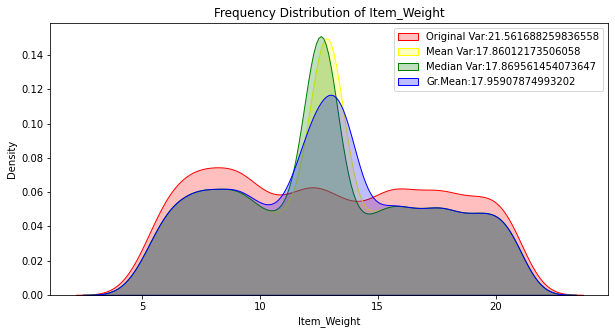

In [38]:
var_orig = train['Item_Weight'].var()
var_mean = train['Item_Weight_Mean'].var()
var_median = train['Item_Weight_Median'].var()
var_grouped_mean = train['Item_Weight_Grouped_Mean'].var()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax = sns.kdeplot(train['Item_Weight'].dropna(), color = 'red', shade = 'True', label = f'Original Var:{var_orig}')
ax = sns.kdeplot(train['Item_Weight_Mean'], color = 'yellow', shade = 'True', label = f'Mean Var:{var_mean}')
ax = sns.kdeplot(train['Item_Weight_Median'], color = 'green', shade = 'True', label = f'Median Var:{var_median}')
ax = sns.kdeplot(train['Item_Weight_Grouped_Mean'], color = 'blue', shade = 'True', label = f'Gr.Mean:{var_grouped_mean}')

ax.set_title('Frequency Distribution of Item_Weight')
ax.legend()

## Mode Imputation

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93


In [40]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [41]:
train['Outlet_Size'].mode().values

array(['Medium'], dtype=object)

In [42]:
train['Outlet_Size'].mode().values[0]

'Medium'

In [43]:
train['Outlet_Size_Mode'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode().values[0])

In [44]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Grouped_Mean,Outlet_Size_Mode
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30,Medium
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92,Medium
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20,Medium
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93,High


# Custom Mode Imputations

In [45]:
train['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [46]:
size_dict = {}
for group, df in train.groupby(['Outlet_Type']):
    if df['Outlet_Size'].isnull().sum() != 0:
        print(f'{group} : {df["Outlet_Size"].isnull().sum()}')
        size_dict[group] = df['Outlet_Size'].mode().values[0]
    

Grocery Store : 555
Supermarket Type1 : 1855


In [47]:
size_dict

{'Grocery Store': 'Small', 'Supermarket Type1': 'Small'}

In [48]:
train['Outlet_Size_Grouped_Mode'] = train['Outlet_Size']
for k,v in size_dict.items():
    train.loc[(train['Outlet_Type'] == k) & (train['Outlet_Size'].isna()), 'Outlet_Size_Grouped_Mode'] = v

In [49]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Grouped_Mean        0
Outlet_Size_Mode                0
Outlet_Size_Grouped_Mode        0
dtype: int64

# Exploratory Data Analysis

In [50]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_Mean',
       'Item_Weight_Median', 'Item_Weight_Grouped_Mean', 'Outlet_Size_Mode',
       'Outlet_Size_Grouped_Mode'],
      dtype='object')

In [51]:
num_cols = ['Item_Weight_Grouped_Mean', 'Item_Visibility', 'Item_MRP']
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size_Grouped_Mode', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

# Exploratory Analysis

In [52]:
# Univariate Analysis

#Continuous Data--> num_cols-->pd.describe()-->distribution(distplot/kdeplot)-->Skewness
#categorical Data --> cat_cols --> value_counts() --> distribution(countplot,boxplot) --> Outliers

# Continuous  

In [53]:
train[num_cols].describe()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,12.860708,0.066132,140.992782
std,4.237815,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,9.310000,0.026989,93.826500
50%,12.800000,0.053931,143.012800
75%,16.000000,0.094585,185.643700
max,21.350000,0.328391,266.888400


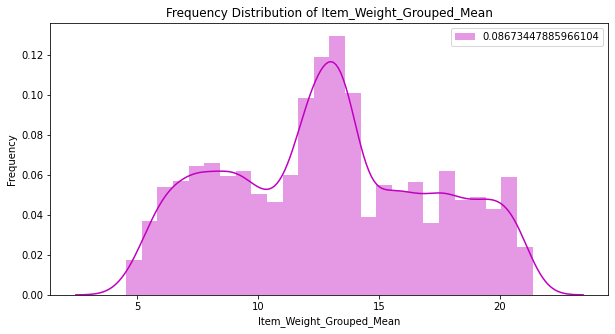

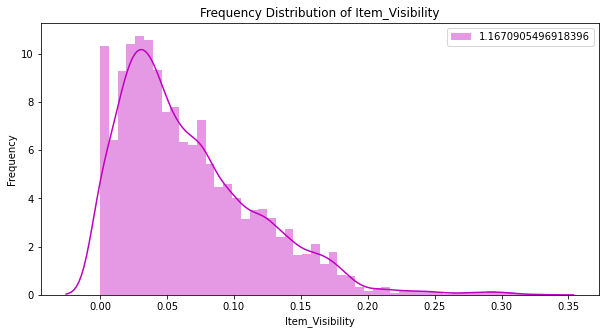

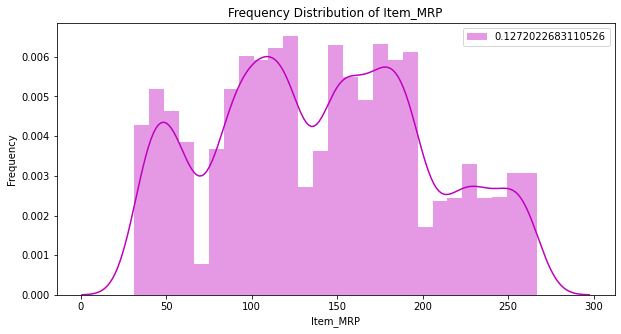

In [54]:
for col in num_cols:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax = sns.distplot(train[col], color = 'm',label = train[col].skew())
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Distribution of {col}')
    ax.legend()

# Categorical

In [55]:
for col in cat_cols:
    print(col,'\n')
    print(train[col].value_counts())
    print('--' * 40)

Item_Fat_Content 

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------------------------------------
Item_Type 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
--------------------------------------------------------------------------------
Outlet_Establishment_Year 

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
-------------------------------------

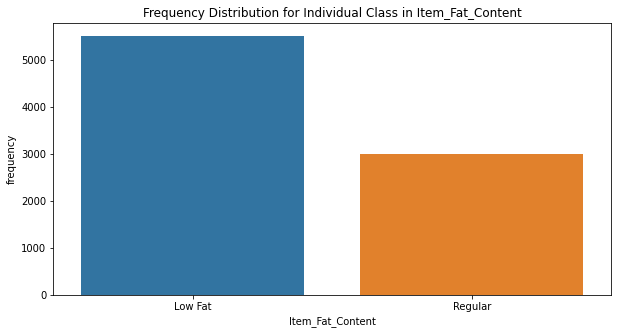

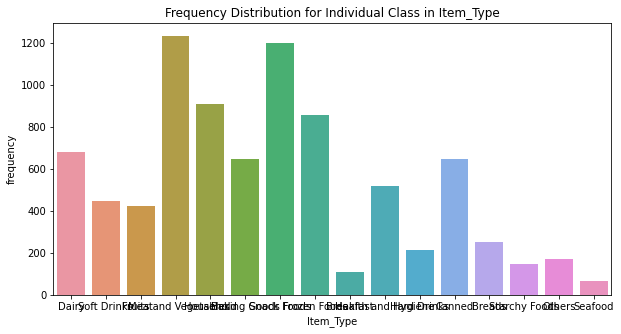

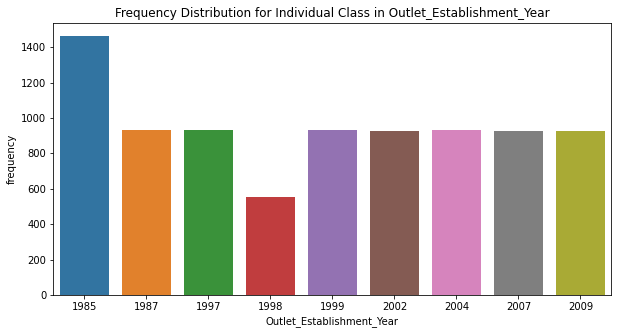

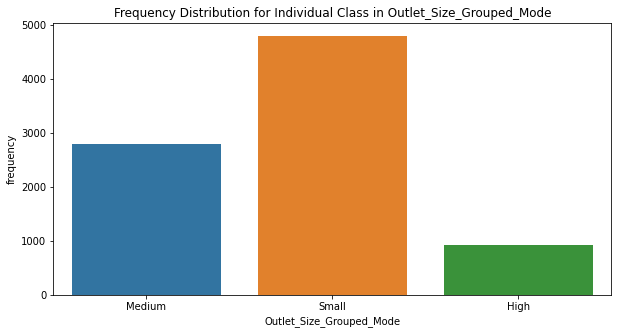

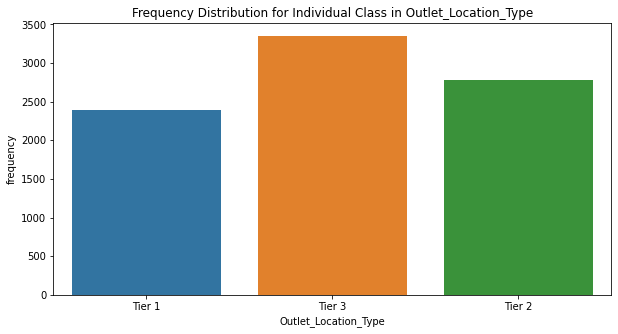

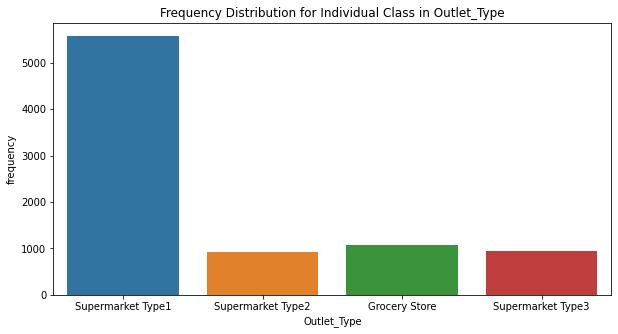

In [56]:
for col in cat_cols:
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    sns.countplot(x = col, data = train, ax = ax)
    ax.set_xlabel(col)
    ax.set_ylabel('frequency')
    ax.set_title(f'Frequency Distribution for Individual Class in {col}')

# Bivariate Analysis

* Cont vs cont --> Pairplot
* cont vs cat --> boxplot
* cat vs cat --> heatmap

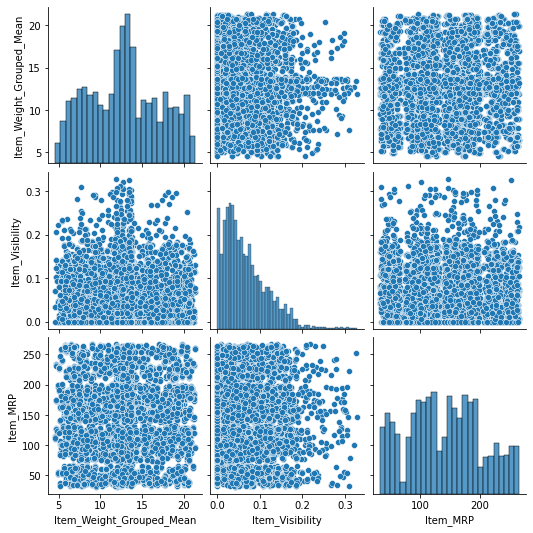

In [57]:
sns.pairplot(train[num_cols])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_MRP'>

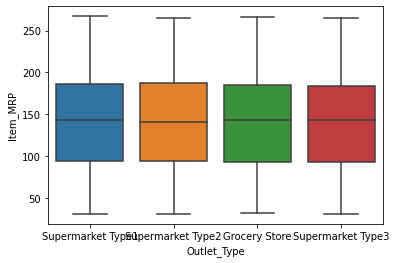

In [58]:
sns.boxplot(x = train['Outlet_Type'], y = train['Item_MRP'], data = train)

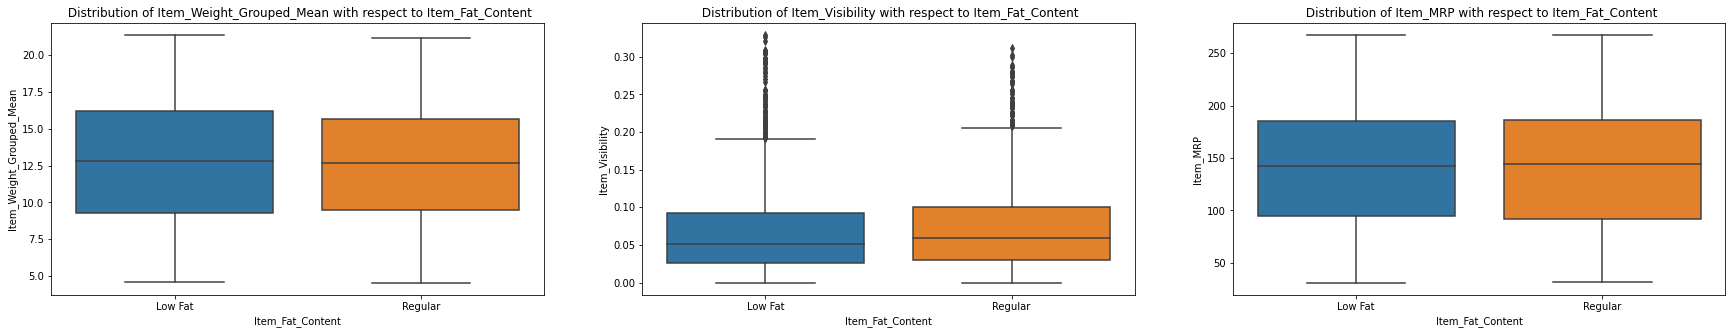

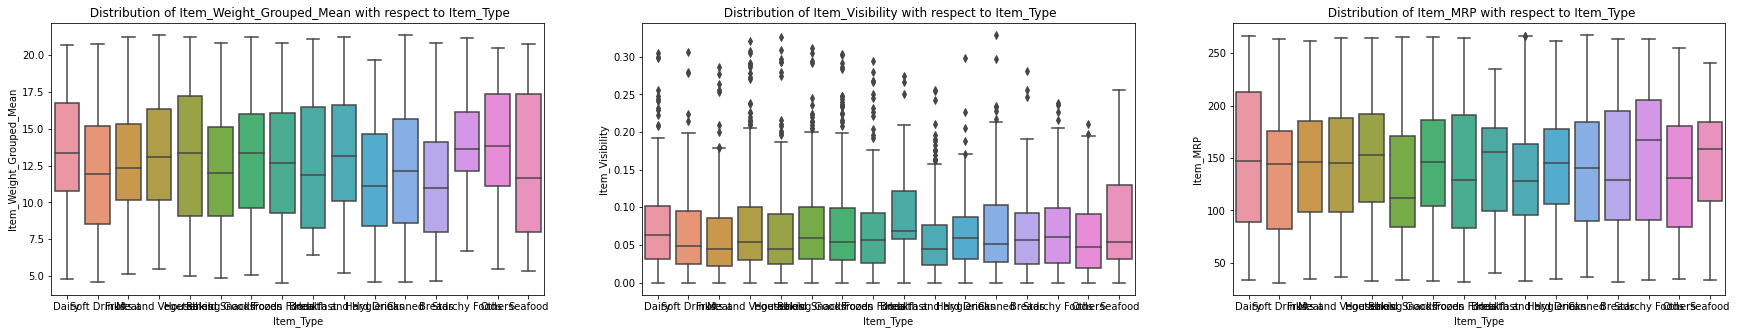

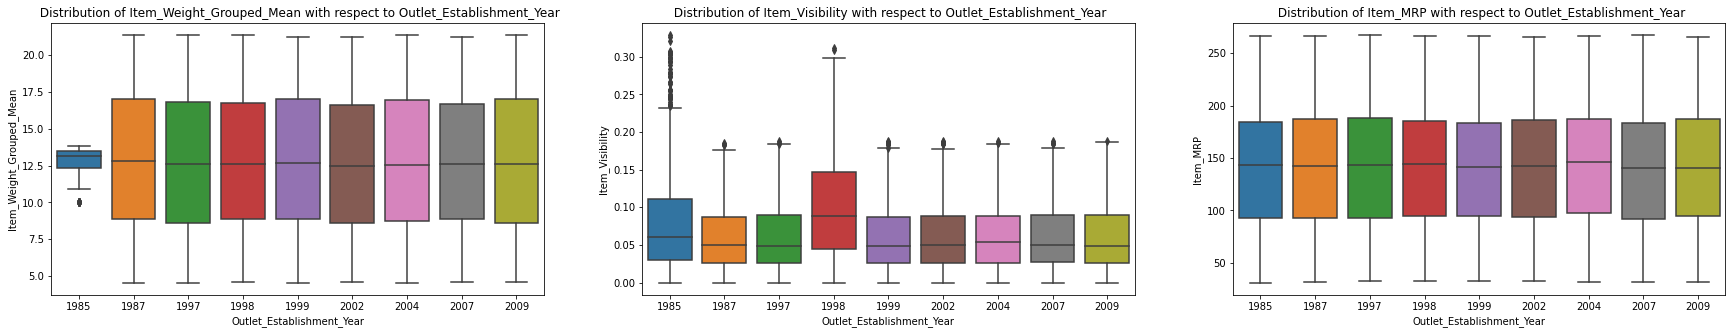

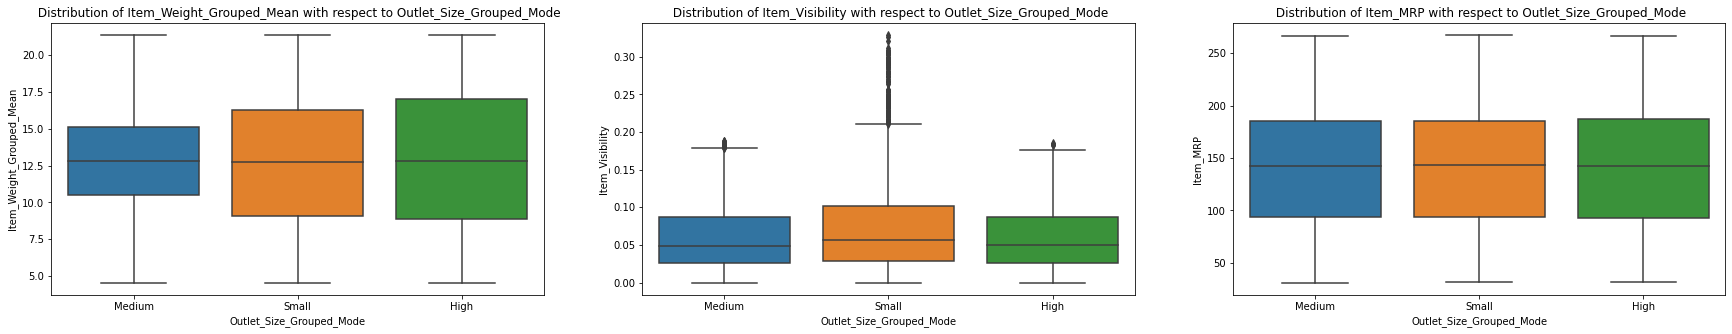

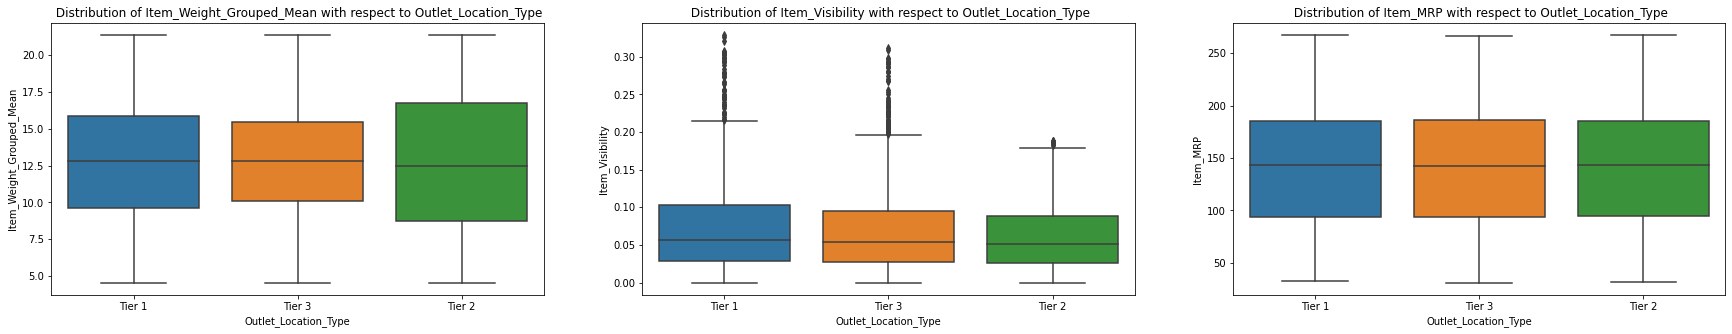

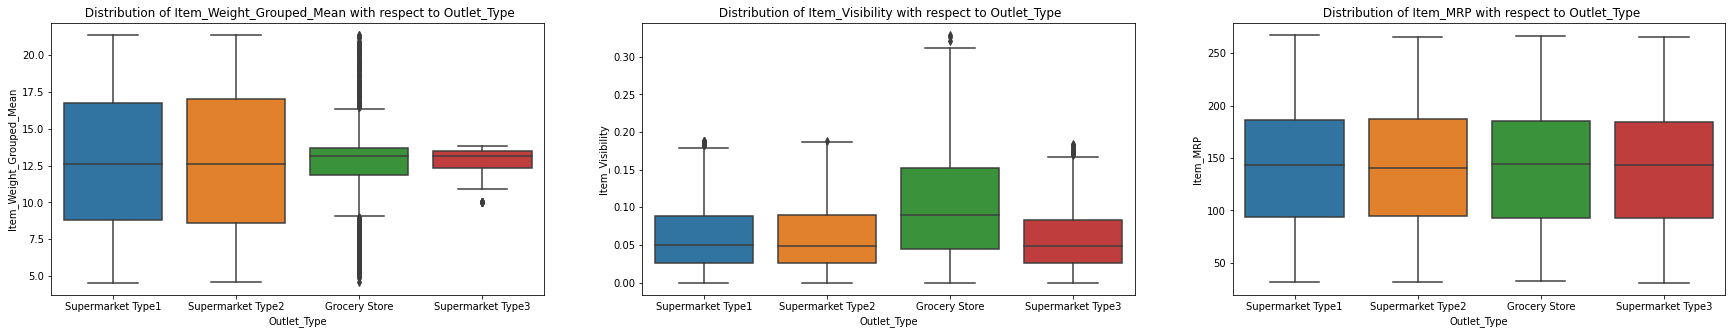

In [59]:
for cat_col in cat_cols:
    fig = plt.figure(figsize = (30,5))
    j = 1
    for num_col in num_cols:
        ax = fig.add_subplot(1, len(num_cols), j)
        sns.boxplot(x = cat_col , y = num_col, data = train, ax = ax)
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)
        ax.set_title(f' Distribution of {num_col} with respect to {cat_col}')
        j = j+1

# Outlier Handling

In [60]:
def handle_outliers(df, var):
    var_data = df[var].values
    q25 = np.percentile(var_data, 25)
    q75 = np.percentile(var_data, 75)
    
    iqr = q75 - q25
    
    lower = q25 - (iqr * 1.5)
    upper = q75 + (iqr * 1.5)
    
    outliers = [x for x in var_data if x < lower or x > upper]
    print(f'Number of Outliers in {var} = {len(outliers)}')
    
    return list(df[(df[var] > upper) | (df[var] < lower)].index)

In [61]:
train_data = train.copy()

In [62]:
train.shape

(8523, 17)

In [63]:
train_data.shape

(8523, 17)

In [64]:
outliers = []
for num_col in num_cols:
    outliers.extend(handle_outliers(train_data, num_col))
    
    outliers = list(set(outliers))

Number of Outliers in Item_Weight_Grouped_Mean = 0
Number of Outliers in Item_Visibility = 144
Number of Outliers in Item_MRP = 0


In [65]:
train_data = train_data.drop(outliers)

In [66]:
train_data.shape

(8379, 17)

In [67]:
8523 - 8379

144

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Visibility'>

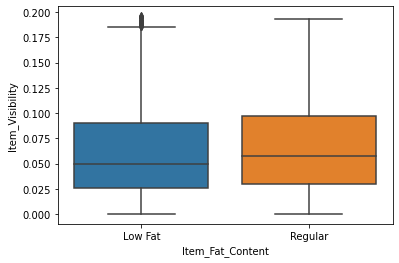

In [68]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Visibility', data = train_data)

# Catergorical Encoding

In [69]:
train_data[num_cols + cat_cols].head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size_Grouped_Mode,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,Regular,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,Low Fat,Meat,1999,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,Regular,Fruits and Vegetables,1998,Small,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,Low Fat,Household,1987,High,Tier 3,Supermarket Type1


In [70]:
pd.get_dummies(train_data[num_cols + cat_cols], columns = cat_cols, drop_first = True)

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,8.930,0.000000,53.8614,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8520,10.600,0.035186,85.1224,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [71]:
train_data_dum = pd.get_dummies(train_data[num_cols + cat_cols + [target]], columns = cat_cols, drop_first = True)

In [72]:
train_data_dum.head()  #no cat data in it

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# Data Splits

In [73]:
from sklearn.model_selection import train_test_split

train_data_train, train_data_test = train_test_split(train_data_dum, test_size = 0.2, random_state = 102)

In [74]:
test = pd.read_csv('test_AbJTz2l.csv')

In [75]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [76]:
train_data_train.shape

(6703, 35)

In [77]:
train_data_test.shape

(1676, 35)

In [78]:
6703 + 1676

8379

In [79]:
train_data.shape

(8379, 17)

In [80]:
x_train = train_data_train.drop(target, axis = 1)
y_train = train_data_train[target]

In [81]:
train_data_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,11.800000,0.014116,178.5344,3390.2536,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
8356,13.707177,0.117531,222.7088,4026.7584,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7554,13.707177,0.079262,81.8250,83.2250,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2101,10.650000,0.048687,164.1526,1808.9786,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3550,11.400328,0.016745,180.7660,3056.0220,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [82]:
x_train.head()

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Grouped_Mode_Medium,Outlet_Size_Grouped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,11.800000,0.014116,178.5344,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
8356,13.707177,0.117531,222.7088,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7554,13.707177,0.079262,81.8250,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2101,10.650000,0.048687,164.1526,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3550,11.400328,0.016745,180.7660,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [83]:
x_test = train_data_test.drop(target, axis = 1)
y_test = train_data_test[target]

In [84]:
x_train.shape

(6703, 34)

In [85]:
x_test.shape

(1676, 34)

In [86]:
y_train.shape

(6703,)

In [87]:
y_test.shape

(1676,)

In [88]:
# Model training -> x_train, y_train
# Model input for prediction -> x_test
# Prediction vs original -> original data -> y_test

# For any class in sklearn

* Create an object
* Train/Fit that object
* Prediction vs Original --> Original data --> y_test


# Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc = StandardScaler()

In [91]:
sc.fit(x_train[num_cols])

StandardScaler()

In [92]:
x_train[num_cols] = sc.transform(x_train[num_cols])

In [93]:
x_train[num_cols]

,Item_Weight_Grouped_Mean,Item_Visibility,Item_MRP
2845,-0.245262,-1.066772,0.591669
8356,0.201935,1.169629,1.298912
7554,0.201935,0.342042,-0.956672
2101,-0.514916,-0.319157,0.361413
3550,-0.338978,-1.009904,0.627397
...,...,...,...
982,-1.211325,1.194318,0.810718
4140,1.525071,0.406683,-1.486957
2929,0.528526,-0.240387,1.626199
2327,-0.009775,-0.917847,0.698265


In [94]:
x_test[num_cols] = sc.transform(x_test[num_cols])

# End of Preprocessing

# Modelling Start

Benchmark -- Single Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lin_reg_bm = LinearRegression()

# Sklearn Expectation

* x --> 2D array(matrix)
* y --> 1D array(vector)

In [97]:
x_train['Item_MRP'].values.reshape(-1,1).shape # 2D array

(6703, 1)

In [98]:
y_train.values

array([3390.2536, 4026.7584,   83.225 , ..., 4604.6728,  555.2772,
       1500.7132])

In [99]:
y_train.values.shape # vector

(6703,)

In [100]:
x_train['Item_MRP'].values.shape # vector

(6703,)

In [101]:
lin_reg_bm.fit(x_train['Item_MRP'].values.reshape(-1,1), y_train.values)

LinearRegression()

# Simple Linear Regression

y_train = b0 + b1*x_train

b0 -> intercept

b1 -> coefficient

Item_Outlet_Sales = b0 + b1 * Item_MRP

In [102]:
b0 = lin_reg_bm.intercept_

b0

2218.945521139788

In [103]:
b1 = lin_reg_bm.coef_

b1

array([980.17492725])

In [104]:
y_pred = lin_reg_bm.predict(x_test['Item_MRP'].values.reshape(-1,1))

y_pred

array([ 790.70637064, 1613.56036941, 1490.2052413 , ..., 4087.16290551,
       2298.4397915 , 3862.00833256])

3 Steps:

lin_reg_bm = LinearRegression() 

lin_reg_bm.fit(x_train['Item_MRP'].values.reshape(-1,1), y_train.values) lin_reg_bm.predict(x_test['Item_MRP'].values.reshape(-1,1))

Actual -> y_test Predicted -> y_pred

In [105]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

#mse
#mae

In [106]:
mse = mean_squared_error(y_test, y_pred)

In [107]:
mae = mean_squared_error(y_test, y_pred)

# Multiple Linear Regression --> Machine Learning

In [108]:
lin_reg_mlr = LinearRegression()

In [109]:
lin_reg_mlr.fit(x_train, y_train)

LinearRegression()

In [110]:
y_pred_mlr = lin_reg_mlr.predict(x_test)

In [111]:
mse_mlr = mean_squared_error(y_test, y_pred)

In [112]:
mae_mlr = mean_absolute_error(y_test, y_pred)

# Modelling at Scale --> Linear,Ridge,Lasso

In [113]:
from sklearn.linear_model import Ridge,Lasso

In [114]:
ridge = Ridge()
lasso = Lasso()

In [115]:
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)

Lasso()

In [116]:
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)

# Modelling at Scale --> OOP CONCEPT

In [117]:
regressors = ['LinearRegression','Ridge','Lasso','BayesianRidge','HuberRegressor']

In [118]:
models = []

mae = []
mse = []
mdae = []
rs = []

In [119]:
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.linear_model import BayesianRidge, HuberRegressor

for regressor in regressors:
    model = eval(regressor)()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    models.append(regressor)
    mae.append(mean_absolute_error(y_test, y_pred))
    mse.append(mean_squared_error(y_test, y_pred))
    mdae.append(median_absolute_error(y_test, y_pred))
    rs.append(r2_score(y_test, y_pred))

In [120]:
res_dict = {'Models':models,
           'MAE': mae,
           'MSE': mse,
           'MDAE': mdae,
           'R2_Score': rs}

In [121]:
res_df = pd.DataFrame(res_dict)

In [122]:
res_df

,Models,MAE,MSE,MDAE,R2_Score
0,LinearRegression,826.996785,1.247981e+06,618.463500,0.568864
1,Ridge,826.952035,1.248032e+06,615.670936,0.568846
2,Lasso,824.977216,1.244013e+06,620.270029,0.570234
3,BayesianRidge,826.752206,1.247859e+06,616.662216,0.568906
4,HuberRegressor,823.115530,1.265283e+06,603.051144,0.562886


In [123]:
res_df.sort_values(by = 'R2_Score', ascending = [False])

,Models,MAE,MSE,MDAE,R2_Score
2,Lasso,824.977216,1.244013e+06,620.270029,0.570234
3,BayesianRidge,826.752206,1.247859e+06,616.662216,0.568906
0,LinearRegression,826.996785,1.247981e+06,618.463500,0.568864
1,Ridge,826.952035,1.248032e+06,615.670936,0.568846
4,HuberRegressor,823.115530,1.265283e+06,603.051144,0.562886


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we tried to build a model using algorithms such as Linear regression, Ridge regression, Lasso regression, BayesianRidge regression and HuberRegressor to get the best possible prediction.
</p></li>     
        
<li><p style="font-family:verdana;">
The hyperparameter tuned Lasso regressor gives us the best r2 score for this problem.
</p></li>    

   

</ul>

</div>

## Submission

In [124]:
Item_Outlet_Sales = model.predict(x_test)

In [125]:
sub = pd.concat([test['Item_Identifier'],test['Outlet_Identifier'],pd.DataFrame(Item_Outlet_Sales, columns = ['Item_Outlet_sales'])],1)

In [126]:
sub=sub.reset_index()

In [127]:
sub.to_csv('submission_lrl.csv',index=False)